In [78]:
import random
import math
import matplotlib.pyplot as plt

# initialize our lists to hold values for plots
temp_list = []
iterations_list = []
delta_e_list = []
value_plot_list = []

def simulated_annealing(problem, temperature_schedule):
  # problem.initial is a tuple (Wx, Wy, Wb)
  # temp threshold so it doesn't iterate forever
  temp_threshold = 1e-5
  # unpack the configuration which is a tuple of weights
  current_wx, current_wy, current_wb = problem
  temp = 1
  for t in range (1, 1000):
    if temp < temp_threshold:
      return (current_wx, current_wy, current_wb)
    # apply temperature schedule
    temp = temperature_schedule(temp)

    # create potential next config by adding random numbers to our current config
    next_wx, next_wy, next_wb = generate_next_config((current_wx, current_wy, current_wb))
    # calculate the current value (objective function we want to minimize)
    current_value = calculate_value((current_wx, current_wy, current_wb))
    # escape hatch courtesy of Professor Badri
    if current_value < 0.005:
      return (current_wx, current_wy, current_wb)
    # calculate the potential next value
    next_value = calculate_value((next_wx, next_wy, next_wb))
    # calculate the change in energy of the system

    delta_e = current_value - next_value
    # accept next config if delta E > 0
    if delta_e > 0:
      current_wx = next_wx
      current_wy = next_wy
      current_wb = next_wb
    else:
      # do not accept the next config until it satisfies the if condition
      # if this random generated num is < e^ deltaE/t then accept the bad solution
      # else scrap the next config and generate another one
      rand_accept = random.randint(1,1000)/1000
      while rand_accept > math.exp(delta_e / temp):
        # need to generate a new next config
        next_wx, next_wy, next_wb = generate_next_config((current_wx, current_wy, current_wb))
        delta_e = current_value - calculate_value((next_wx, next_wy, next_wb))
        rand_accept = random.randint(1,1000)/1000
      # once the while loop breaks we know we have a next config that will be rand_accept < math.exp
      # so it is safe to put the next config into the current
      current_wx = next_wx
      current_wy = next_wy
      current_wb = next_wb
    # add items to their lists for graphing purposes once we know the next config has been accepted
    # this signals the end of one iteration or "epoch"
    delta_e_list.append(delta_e)
    temp_list.append(temp)
    iterations_list.append(t)
    value_plot_list.append(current_value)

def generate_next_config(config):
  c_wx, c_wy, c_wb = config
  next_wx = c_wx + random.randint(-2,2)
  next_wy = c_wy + random.randint(-2,2)
  next_wb = c_wb + random.randint(-2,2)
  return (next_wx, next_wy, next_wb)

def temperature_schedule(t):
  """
  Take input t as current temperature and decrease by t / 1.2
  """
  return t / 1.5

def calculate_value(config):
  wx, wy, wb = config
  # X,Y = 0,0
  xy_value_1 = wx * 0 + wy * 0 + wb * 1
  # X,Y = 0,1
  xy_value_2 = wx * 0 + wy * 1 + wb * 1
  # X,Y = 1,0
  xy_value_3 = wx * 1 + wy * 0 + wb * 1
  # X,Y = 1,1
  xy_value_4 = wx * 1 + wy * 1 + wb * 1
  # error X,Y = 0,0
  xy_error_1 = abs(0 - 1 / (1+ math.exp(-xy_value_1)))
  # error X,Y = 0,1
  xy_error_2 = abs(0 - 1 / (1+ math.exp(-xy_value_2)))
  # error X,Y = 1,0
  xy_error_3 = abs(0 - 1 / (1+ math.exp(-xy_value_3)))
  # error X,Y = 1,1
  xy_error_4 = abs(0 - 1 / (1+ math.exp(-xy_value_4)))
  # return the sum of the errors for value of objective func
  # we want to minimize this value
  return xy_error_1 + xy_error_2 + xy_error_3 + xy_error_4

def plot_values(x_axis_list, y_axis_list, xlabel, ylabel):
  plt.plot(x_axis_list, y_axis_list)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

# the tuple represents the weights (Wx, Wy, Wb)
initial_config = (0, 0, 0)
wx, wy, wb = simulated_annealing(initial_config, temperature_schedule)

print(f'Wx: {wx}')
print(f'Wy: {wy}')
print(f'Wb: {wb}')

Wx: -1
Wy: -5
Wb: -7


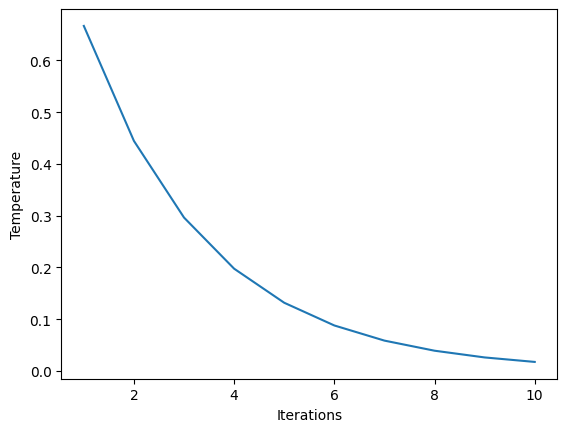

In [79]:
# Plot temperature against iterations
plot_values(iterations_list, temp_list, "Iterations", "Temperature")

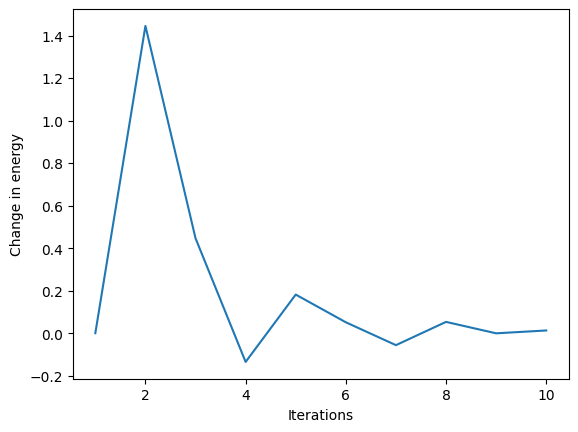

In [80]:
# Plot delta E against iterations
plot_values(iterations_list, delta_e_list, "Iterations", "Change in energy")

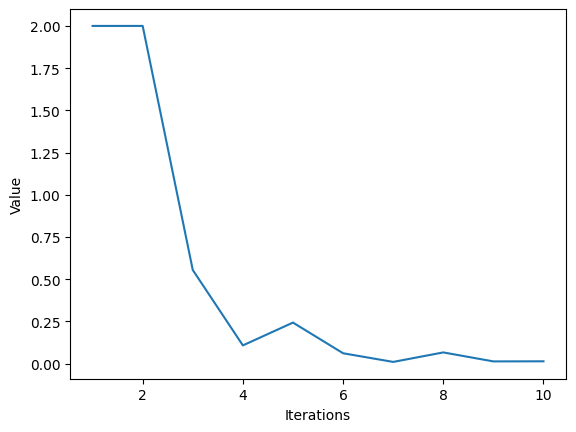

In [81]:
# Plot value of objective function against iterations
plot_values(iterations_list, value_plot_list, "Iterations", "Value")